In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_salary.csv')

In [3]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [6]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
df1 = df.copy()

In [8]:
df1.columns = df1.columns.str.strip()

In [9]:
df1.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [10]:
df1.drop('Name',axis=1,inplace=True)

In [11]:
df1

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [12]:
df1.isnull().sum()

JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [13]:
df1 = df1.dropna(subset=['HireDate'])

In [14]:
df1.isnull().sum()

JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [15]:
df1 = df1.drop('GrossPay',axis=1)

In [16]:
df1

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00
...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00


In [17]:
df1['AnnualSalary'] = df1['AnnualSalary'].apply(lambda x: float(str(x)[1:]))

In [18]:
df1

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18911 non-null  object 
 1   AgencyID      18911 non-null  object 
 2   Agency        18911 non-null  object 
 3   HireDate      18911 non-null  object 
 4   AnnualSalary  18911 non-null  float64
dtypes: float64(1), object(4)
memory usage: 886.5+ KB


In [20]:
#### hiredate - day,month and year
df1['month'] = df1['HireDate'].apply(lambda x: int(str(x)[0:2]))
df1['day'] = df1['HireDate'].apply(lambda x: int(str(x)[3:5]))
df1['year'] = df1['HireDate'].apply(lambda x: int(str(x)[6:]))

In [21]:
######### eda
df1.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [22]:
df1.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [23]:
df1.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

<AxesSubplot:>

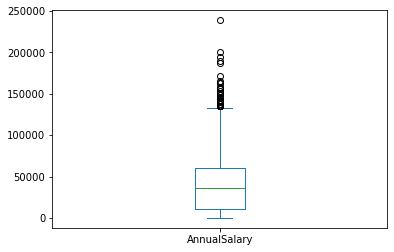

In [24]:
### Annuary salary
df1.AnnualSalary.plot.box()

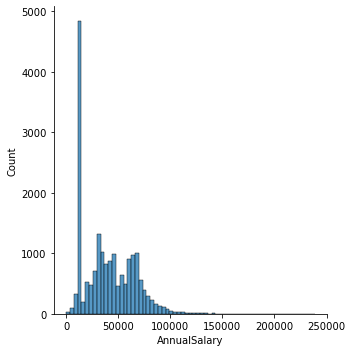

In [25]:
sns.displot(df1.AnnualSalary)

In [26]:
df1[df1['AnnualSalary']>150000].shape

(16, 8)

In [27]:
df1 = df1[df1['AnnualSalary']<150000]

<AxesSubplot:>

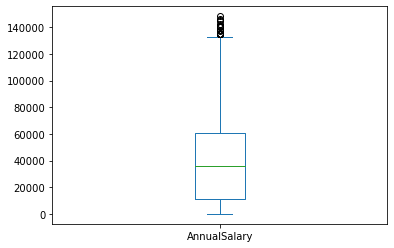

In [28]:
df1.AnnualSalary.plot.box()

In [29]:
df1[df1['AnnualSalary']>140000].shape

(9, 8)

In [30]:
df1 = df1[df1['AnnualSalary']<140000]

<AxesSubplot:>

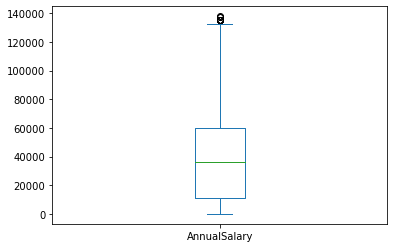

In [31]:
df1.AnnualSalary.plot.box()

Text(0.5, 1.0, 'Top 10 job')

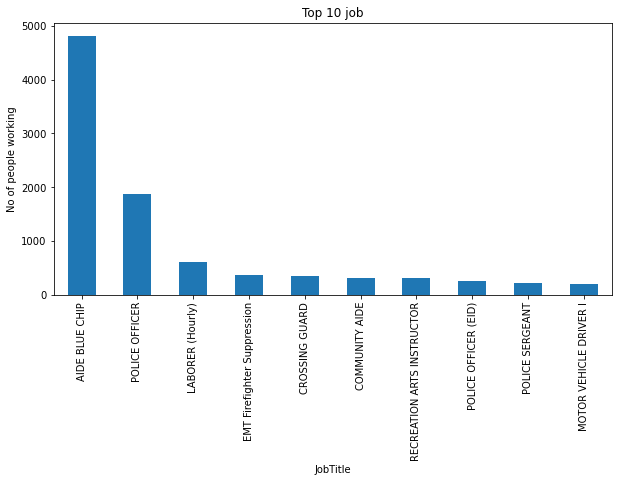

In [32]:
### top 10 jobs for which hiring is there
plt.figure(figsize=(10,5))
df1.groupby(['JobTitle'])['JobTitle'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people working')
plt.title('Top 10 job')


In [33]:
df1.groupby(['JobTitle'])['AnnualSalary'].mean()

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

Text(0.5, 1.0, 'Top 10 Job with Highest Average Salary')

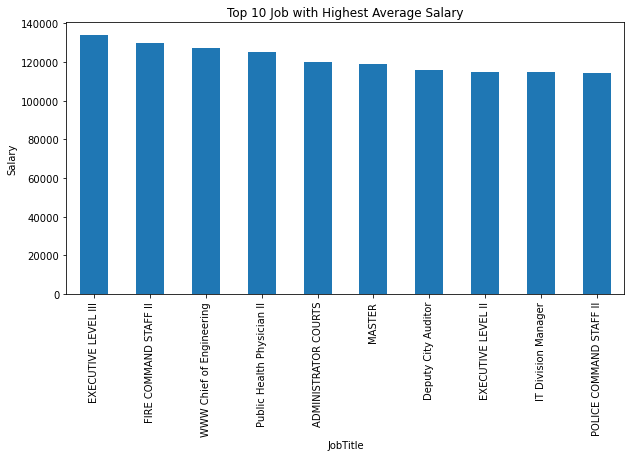

In [34]:
## top 10 jobs which fetch higher avg salary
plt.figure(figsize=(10,5))
df1.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Salary')
plt.title('Top 10 Job with Highest Average Salary')

Text(0.5, 1.0, 'Top 10 hiring agencies')

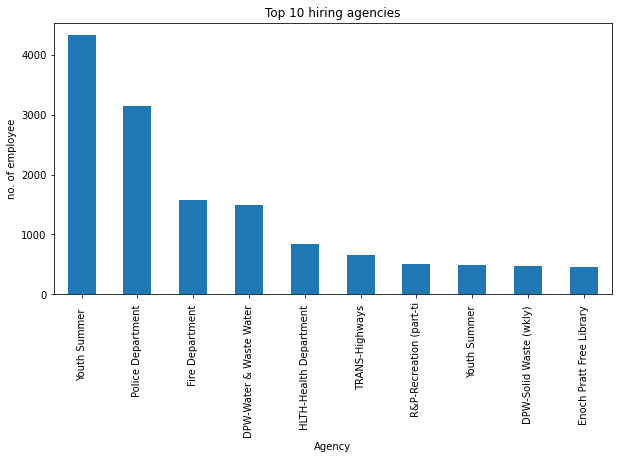

In [35]:
### top 10 agencies that have higher number of employee
plt.figure(figsize=(10,5))
df1.groupby(['Agency'])['Agency'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('no. of employee')
plt.title('Top 10 hiring agencies')

Text(0.5, 1.0, 'Top 10 AgencyID with Highest Number of Employee')

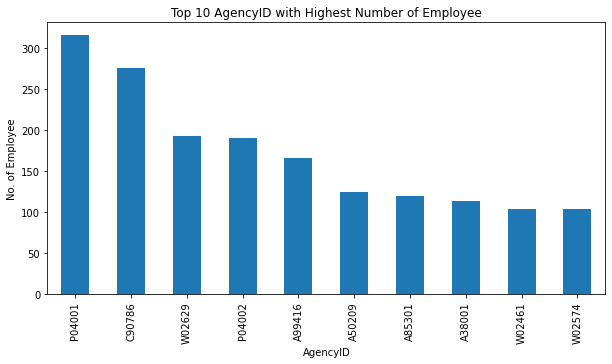

In [36]:
### top 10 agency ids having higher number of employees
## Top 10 Agnecy ID having highest number of Employees
plt.figure(figsize=(10,5))
df1.groupby(['AgencyID'])['AgencyID'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('No. of Employee')
plt.title('Top 10 AgencyID with Highest Number of Employee')

<AxesSubplot:xlabel='year', ylabel='AnnualSalary'>

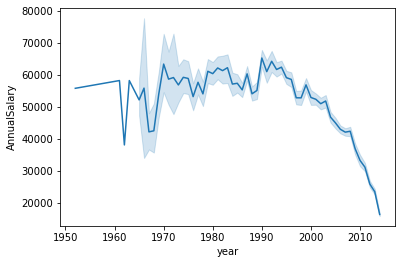

In [37]:
### annual salary per year - 
sns.lineplot(df1['year'],df1['AnnualSalary'])

Text(0.5, 1.0, 'month vs avg salary')

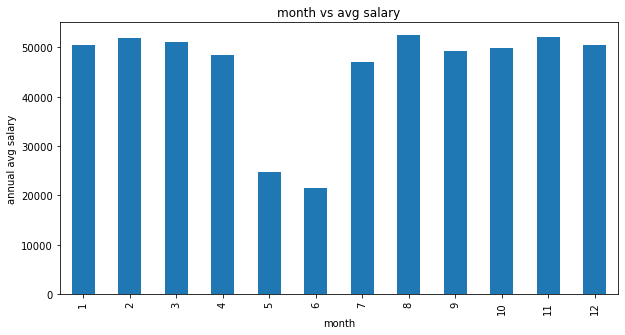

In [38]:
####  bar graph and month vs avg salary
plt.figure(figsize=(10,5))
df1.groupby(['month'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('annual avg salary')
plt.xlabel('month')
plt.title('month vs avg salary')

Text(0.5, 1.0, 'Month vs Number of Employees')

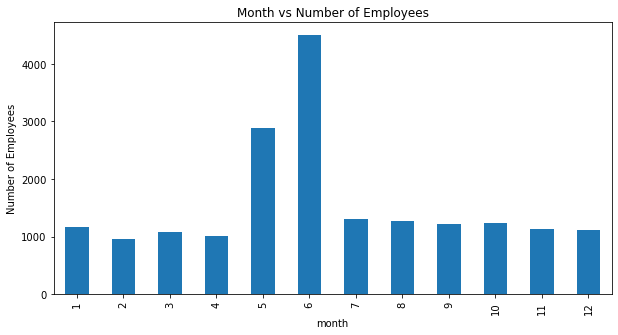

In [39]:
## in which month higher number of people are hired
plt.figure(figsize=(10,5))
df1.groupby(['month'])['JobTitle'].count().plot.bar()
plt.ylabel('Number of Employees')
plt.xlabel('month')
plt.title('Month vs Number of Employees')

<AxesSubplot:>

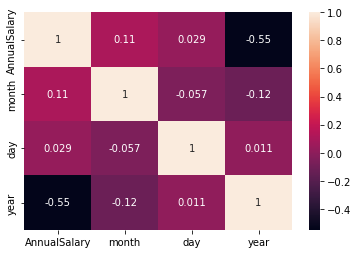

In [40]:
sns.heatmap(df1.corr(),annot=True)

In [41]:
df1.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013


In [42]:
df1.drop('HireDate',axis=1,inplace=True)

In [43]:
df1

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,11310.0,5,21,2014
18977,AIDE BLUE CHIP,W02629,Youth Summer,11310.0,5,21,2014
18978,POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,12,17,2013
18979,POLICE OFFICER,A99262,Police Department,44104.0,1,23,2013


In [45]:
### label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['JobTitle'] = le.fit_transform(df1['JobTitle'])
df1['Agency'] = le.fit_transform(df1['Agency'])
df1['AgencyID'] = le.fit_transform(df1['AgencyID'])

In [46]:
df1

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,30,752,63,11310.0,6,10,2013
1,413,12,44,53428.0,10,24,1979
2,50,107,55,68300.0,9,25,2006
3,363,317,24,62000.0,7,23,2009
4,741,615,47,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,30,785,63,11310.0,5,21,2014
18977,30,1108,62,11310.0,5,21,2014
18978,741,615,47,43999.0,12,17,2013
18979,739,544,47,44104.0,1,23,2013


In [49]:
y = df1.pop('AnnualSalary')
x = df1

In [50]:
x

,JobTitle,AgencyID,Agency,month,day,year
0,30,752,63,6,10,2013
1,413,12,44,10,24,1979
2,50,107,55,9,25,2006
3,363,317,24,7,23,2009
4,741,615,47,7,24,2013
...,...,...,...,...,...,...
18976,30,785,63,5,21,2014
18977,30,1108,62,5,21,2014
18978,741,615,47,12,17,2013
18979,739,544,47,1,23,2013


In [51]:
y

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: AnnualSalary, Length: 18885, dtype: float64

In [52]:
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [53]:
x

,JobTitle,AgencyID,Agency,month,day,year
0,-1.215715,0.818207,1.110364,-0.125420,-0.687804,0.858322
1,-0.062337,-1.588452,0.144954,1.231146,0.981832,-2.413642
2,-1.155487,-1.279489,0.703876,0.892004,1.101092,0.184682
3,-0.212909,-0.596518,-0.871268,0.213721,0.862573,0.473385
4,0.925413,0.372650,0.297387,0.213721,0.981832,0.858322
...,...,...,...,...,...,...
18976,-1.215715,0.925531,1.110364,-0.464562,0.624053,0.954556
18977,-1.215715,1.976005,1.059553,-0.464562,0.624053,0.954556
18978,0.925413,0.372650,0.297387,1.909429,0.147014,0.858322
18979,0.919390,0.141741,0.297387,-1.821128,0.862573,0.858322


In [55]:
x.describe()

,JobTitle,AgencyID,Agency,month,day,year
count,1.888500e+04,1.888500e+04,1.888500e+04,1.888500e+04,1.888500e+04,1.888500e+04
mean,3.452068e-16,1.017749e-16,4.742243e-16,6.561162e-16,9.034267e-17,-4.704971e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.306058e+00,-1.627479e+00,-2.090735e+00,-1.821128e+00,-1.761141e+00,-5.011967e+00
25%,-1.215715e+00,-9.119856e-01,-9.728907e-01,-4.645619e-01,-8.070634e-01,-5.851918e-01
50%,1.897162e-02,-2.737583e-02,2.973869e-01,-1.254204e-01,2.775464e-02,2.809163e-01
75%,9.193898e-01,6.100636e-01,1.059553e+00,5.528626e-01,7.433129e-01,8.583217e-01
max,1.904128e+00,2.193905e+00,1.161176e+00,1.909429e+00,1.816650e+00,9.545560e-01


In [69]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.25,random_state=30)

In [70]:
x_train.shape

(14163, 6)

In [71]:
x_test.shape

(4722, 6)

In [72]:
x.shape

(18885, 6)

In [73]:
lr  = LinearRegression()
salary = lr.fit(x_train,y_train)

In [74]:
y_pred = salary.predict(x_test)

In [75]:
y_pred

array([39125.6303602 , 21628.43141901, 45805.8894204 , ...,
       42505.90916049, 33290.6962245 , 30729.71360933])

In [76]:
y_test

856       30816.0
9242      11310.0
12695     88821.0
15158    135000.0
301       11310.0
           ...   
17317     11310.0
18641     44104.0
2981      10941.0
5907      32968.0
18106     18408.0
Name: AnnualSalary, Length: 4722, dtype: float64

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.46524660602694023

In [78]:
r2_score(y_train,salary.predict(x_train))

0.4703237030540923

In [80]:
#### there were two many categories  - mean encoding
from sklearn.svm import SVR

In [81]:
svr  = SVR()
salary = svr.fit(x_train,y_train)
r2_score(y_test,salary.predict(x_test))

0.04674271071717151